# 지하철 시간대별 데이터 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... Sorry~~~')

## 1. 이용 현황 데이터 정제

### (1) 지하철 시간대별 데이터 파일로드
### (2) 데이터 중 0이 들어 있는 데이터 행 제거
### (3) '사용월', '작업일시' 컬럼 삭제
### (4) 데이터프레임에서 2번째 줄 헤더 삭제
### (5) 시간대가 포함된 열명을 '000 승차'로 변경


In [2]:
subway_raw = pd.read_csv('./data/subway_time_202403.csv', encoding='utf-8')
subway_raw.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2024-03,1호선,150.0,서울역,686,25,"8,354","8,884","13,709","59,387",...,"15,365","2,922","3,882",0,249,0,0,0,0,2024-04-03 10:09:27
2,2024-03,1호선,151.0,시청,90,2,"2,209","5,148","4,267","26,852",...,"4,609",588,"1,325",0,44,0,0,0,0,2024-04-03 10:09:27
3,2024-03,1호선,152.0,종각,166,8,"3,937","5,736","4,593","30,251",...,"4,695","1,724","1,489",0,0,0,0,0,0,2024-04-03 10:09:27
4,2024-03,1호선,153.0,종로3가,181,14,"4,155","2,562","3,762","12,688",...,"5,336","1,532","2,489",0,43,0,0,0,0,2024-04-03 10:09:27


In [ ]:
subway_raw.drop(['사용월','작업일시'], axis = 1, inplace=True)

In [5]:
subway_raw

,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,1호선,150.0,서울역,686,25,"8,354","8,884","13,709","59,387","43,653",...,"27,169","15,365","2,922","3,882",0,249,0,0,0,0
2,1호선,151.0,시청,90,2,"2,209","5,148","4,267","26,852","8,516",...,"10,115","4,609",588,"1,325",0,44,0,0,0,0
3,1호선,152.0,종각,166,8,"3,937","5,736","4,593","30,251","6,932",...,"27,626","4,695","1,724","1,489",0,0,0,0,0,0
4,1호선,153.0,종로3가,181,14,"4,155","2,562","3,762","12,688","6,021",...,"17,041","5,336","1,532","2,489",0,43,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,신림선,4407.0,당곡,1,0,"2,138",222,"4,505","1,351","13,953",...,"1,021","4,254",219,"1,343",0,0,0,0,0,0
619,신림선,4408.0,신림,3,0,"1,056",285,"1,484",822,"4,465",...,885,"2,061",320,685,0,3,0,0,0,0
620,신림선,4409.0,서원,0,0,"2,351",276,"4,480",800,"14,425",...,489,"4,522",114,"1,502",2,2,0,0,0,0
621,신림선,4410.0,서울대벤처타운,10,0,"6,230",539,"10,451","4,122","32,093",...,"2,122","12,669",544,"5,434",0,177,0,0,0,0


In [6]:
for n in range(3, len(subway_raw.columns)):
    if 'Unnamed' in subway_raw.columns[n]:
        prev_column_name = subway_raw.columns[n-1]
        if '승차' in prev_column_name:
            prev_column_name = prev_column_name.replace(' 승차', '')
        subway_raw.rename(columns={subway_raw.columns[n]: str(prev_column_name) + ' ' + str(subway_raw.iloc[0, n])} , inplace=True)
    else:
        subway_raw.rename(columns={subway_raw.columns[n]: str(subway_raw.columns[n]) + ' ' + str(subway_raw.iloc[0, n])} , inplace=True)

subway_raw

,호선명,역ID,지하철역,04:00:00~04:59:59 승차,04:00:00~04:59:59 하차,05:00:00~05:59:59 승차,05:00:00~05:59:59 하차,06:00:00~06:59:59 승차,06:00:00~06:59:59 하차,07:00:00~07:59:59 승차,...,23:00:00~23:59:59 승차,23:00:00~23:59:59 하차,00:00:00~00:59:59 승차,00:00:00~00:59:59 하차,01:00:00~01:59:59 승차,01:00:00~01:59:59 하차,02:00:00~02:59:59 승차,02:00:00~02:59:59 하차,03:00:00~03:59:59 승차,03:00:00~03:59:59 하차
0,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,1호선,150.0,서울역,686,25,"8,354","8,884","13,709","59,387","43,653",...,"27,169","15,365","2,922","3,882",0,249,0,0,0,0
2,1호선,151.0,시청,90,2,"2,209","5,148","4,267","26,852","8,516",...,"10,115","4,609",588,"1,325",0,44,0,0,0,0
3,1호선,152.0,종각,166,8,"3,937","5,736","4,593","30,251","6,932",...,"27,626","4,695","1,724","1,489",0,0,0,0,0,0
4,1호선,153.0,종로3가,181,14,"4,155","2,562","3,762","12,688","6,021",...,"17,041","5,336","1,532","2,489",0,43,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,신림선,4407.0,당곡,1,0,"2,138",222,"4,505","1,351","13,953",...,"1,021","4,254",219,"1,343",0,0,0,0,0,0
619,신림선,4408.0,신림,3,0,"1,056",285,"1,484",822,"4,465",...,885,"2,061",320,685,0,3,0,0,0,0
620,신림선,4409.0,서원,0,0,"2,351",276,"4,480",800,"14,425",...,489,"4,522",114,"1,502",2,2,0,0,0,0
621,신림선,4410.0,서울대벤처타운,10,0,"6,230",539,"10,451","4,122","32,093",...,"2,122","12,669",544,"5,434",0,177,0,0,0,0


In [7]:
subway_raw.drop(0, axis = 0,  inplace =True)

In [8]:
subway_copy = subway_raw.copy()

In [9]:
subway_copy.head()

,호선명,역ID,지하철역,04:00:00~04:59:59 승차,04:00:00~04:59:59 하차,05:00:00~05:59:59 승차,05:00:00~05:59:59 하차,06:00:00~06:59:59 승차,06:00:00~06:59:59 하차,07:00:00~07:59:59 승차,...,23:00:00~23:59:59 승차,23:00:00~23:59:59 하차,00:00:00~00:59:59 승차,00:00:00~00:59:59 하차,01:00:00~01:59:59 승차,01:00:00~01:59:59 하차,02:00:00~02:59:59 승차,02:00:00~02:59:59 하차,03:00:00~03:59:59 승차,03:00:00~03:59:59 하차
1,1호선,150.0,서울역,686,25,"8,354","8,884","13,709","59,387","43,653",...,"27,169","15,365","2,922","3,882",0,249,0,0,0,0
2,1호선,151.0,시청,90,2,"2,209","5,148","4,267","26,852","8,516",...,"10,115","4,609",588,"1,325",0,44,0,0,0,0
3,1호선,152.0,종각,166,8,"3,937","5,736","4,593","30,251","6,932",...,"27,626","4,695","1,724","1,489",0,0,0,0,0,0
4,1호선,153.0,종로3가,181,14,"4,155","2,562","3,762","12,688","6,021",...,"17,041","5,336","1,532","2,489",0,43,0,0,0,0
5,1호선,154.0,종로5가,58,1,"2,084","3,639","3,293","16,308","6,024",...,"6,554","4,121",401,"1,456",0,1,0,0,0,0


In [10]:
import re
from pandas.api.types import is_string_dtype

for n in subway_copy.columns:
    if '~' in n:
        if is_string_dtype(subway_copy[n]):
            subway_copy[n] = subway_copy[n].str.replace(',','').astype('int64')

subway_copy['역ID'] = subway_copy['역ID'].astype('int64')

In [11]:
subway_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 1 to 622
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   호선명                   622 non-null    object
 1   역ID                   622 non-null    int64 
 2   지하철역                  622 non-null    object
 3   04:00:00~04:59:59 승차  622 non-null    int64 
 4   04:00:00~04:59:59 하차  622 non-null    int64 
 5   05:00:00~05:59:59 승차  622 non-null    int64 
 6   05:00:00~05:59:59 하차  622 non-null    int64 
 7   06:00:00~06:59:59 승차  622 non-null    int64 
 8   06:00:00~06:59:59 하차  622 non-null    int64 
 9   07:00:00~07:59:59 승차  622 non-null    int64 
 10  07:00:00~07:59:59 하차  622 non-null    int64 
 11  08:00:00~08:59:59 승차  622 non-null    int64 
 12  08:00:00~08:59:59 하차  622 non-null    int64 
 13  09:00:00~09:59:59 승차  622 non-null    int64 
 14  09:00:00~09:59:59 하차  622 non-null    int64 
 15  10:00:00~10:59:59 승차  622 non-null    in

# 2.

In [12]:
subway_copy['출근시간 승하차인원'] = subway_copy['07:00:00~07:59:59 승차'] +subway_copy['07:00:00~07:59:59 하차'] + subway_copy['08:00:00~08:59:59 승차'] + subway_copy['08:00:00~08:59:59 하차']

In [14]:
subway_copy['출근시간 승하차인원']

1      470275
2      287537
3      394052
4      109711
5      154076
        ...  
618     45778
619     15430
620     37873
621     93658
622     31766
Name: 출근시간 승하차인원, Length: 622, dtype: int64

In [16]:
subway_copy.sort_values(by='출근시간 승하차인원', ascending=False).iloc[0]['지하철역']

'구로디지털단지'

In [17]:
subway_copy.sort_values(by='출근시간 승하차인원', ascending=False).iloc[0]['출근시간 승하차인원']

624255

# 3. 시간대별로 사람들이 가장 많이 타고 내리는 역?

In [33]:
columns = [val for idx, val in enumerate(subway_copy.columns) if idx > 2 and idx < 51]
subway_copy = subway_copy.drop(['출근시간 승하차인원' , '역ID'], axis = 1)
station_data = pd.pivot_table(subway_copy, columns=['호선명', '지하철역'])
station_data.reset_index()
station_data.head()

호선명                    1호선                                                  \
지하철역                   동대문   동묘앞   서울역    시청   신설동   제기동    종각  종로3가  종로5가   
00:00:00~00:59:59 승차   770   135  2922   588   427   197  1724  1532   401   
00:00:00~00:59:59 하차  3104  2645  3882  1325  2938  1662  1489  2489  1456   
01:00:00~01:59:59 승차     1     0     0     0     0     1     0     0     0   
01:00:00~01:59:59 하차   284   278   249    44     1     1     0    43     1   
02:00:00~02:59:59 승차     0     0     0     0     0     0     0     0     0   

호선명                                ... 중앙선                                    \
지하철역                 청량리(서울시립대입구)  ...  양정    양평  오빈   용문 운길산  원덕   중랑 지평 팔당   
00:00:00~00:59:59 승차          339  ...   2    67   3    1   1   4   34  0  1   
00:00:00~00:59:59 하차         3766  ...  68  1068  72  705   3  97  574  0  2   
01:00:00~01:59:59 승차            1  ...   0     0   0    0   0   0    0  0  0   
01:00:00~01:59:59 하차            1  ...   0     0   0    0   0   0    0  0  0   
02:00:00~02:59:59 승차            0  ...   0     0   0    0   0   0    0  0  0   

호선명                         
지하철역                    회기  
00:00:00~00:59:59 승차   858  
00:00:00~00:59:59 하차  6582  
01:00:00~01:59:59 승차     1  
01:00:00~01:59:59 하차     0  
02:00:00~02:59:59 승차     0  

[5 rows x 622 columns]

In [50]:
# 각 역별 최대 승하차 인원 구하기
max_people = [0] * 24 # 시간대별 최대 승하차 인원 저장
max_station = [''] * 24 # 시간대별 최대 승하차 인원 역 이름 저장
idx = 0

for i in range(0, len(station_data.index)-1, 2): #인덱스(시간대)별 반복
    for j, val in enumerate(station_data.columns): # 컬럼(지하철역)별 반복
        # total = 역별 승차인원 + 역별 하차인원
        total = station_data.iloc[i][val] + station_data.iloc[i+1][val]
        if total > max_people[idx]:
            max_people[idx] = total
            max_station[idx] = val
        total = 0
    print(station_data.index[i], ',' , max_station[idx],',', max_people[idx])
    idx += 1
    

00:00:00~00:59:59 승차 , ('2호선', '홍대입구') , 30714
01:00:00~01:59:59 승차 , ('2호선', '서울대입구(관악구청)') , 3233
02:00:00~02:59:59 승차 , ('9호선', '개화') , 10
03:00:00~03:59:59 승차 , ('9호선', '마곡나루(서울식물원)') , 1
04:00:00~04:59:59 승차 , ('경부선', '구로') , 11165
05:00:00~05:59:59 승차 , ('2호선', '구로디지털단지') , 44047
06:00:00~06:59:59 승차 , ('2호선', '잠실(송파구청)') , 87381
07:00:00~07:59:59 승차 , ('2호선', '구로디지털단지') , 221687
08:00:00~08:59:59 승차 , ('7호선', '가산디지털단지') , 410664
09:00:00~09:59:59 승차 , ('2호선', '강남') , 374339
10:00:00~10:59:59 승차 , ('2호선', '잠실(송파구청)') , 218237
11:00:00~11:59:59 승차 , ('2호선', '잠실(송파구청)') , 220772
12:00:00~12:59:59 승차 , ('2호선', '홍대입구') , 242982
13:00:00~13:59:59 승차 , ('2호선', '홍대입구') , 272469
14:00:00~14:59:59 승차 , ('2호선', '홍대입구') , 274539
15:00:00~15:59:59 승차 , ('2호선', '홍대입구') , 304918
16:00:00~16:59:59 승차 , ('2호선', '홍대입구') , 347792
17:00:00~17:59:59 승차 , ('2호선', '홍대입구') , 410372
18:00:00~18:59:59 승차 , ('2호선', '강남') , 504287
19:00:00~19:59:59 승차 , ('2호선', '홍대입구') , 369748
20:00:00~20:59:59 승차 , ('2호선

In [51]:
# 그래프에서 한글 폰트 처리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... Sorry~~~')

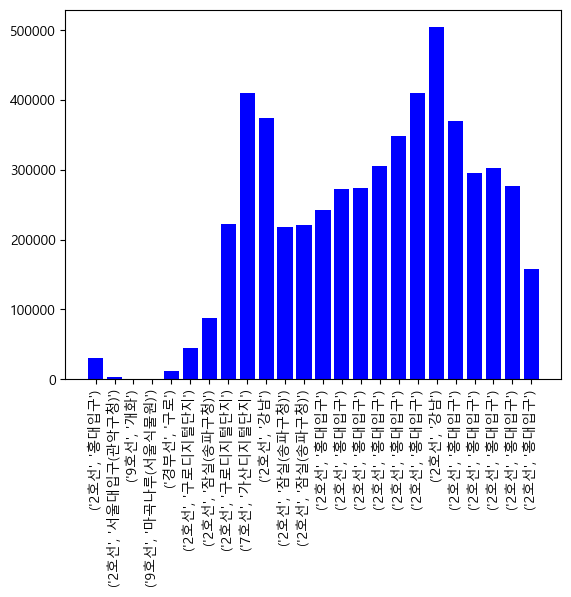

In [52]:
plt.bar(range(24), max_people, color='b')
plt.xticks(range(24), max_station, rotation=90)
plt.show()

# 4. 모든 지하철역에서 시간대별 승하차인원을 모두 더하여 승하차 인원이 가장 많은 역 10개를 찾으시오
## - 역 이름, 승하차인원수 출력
## - 바 차트로 시각화

In [91]:
# 각 역별 최대 승하차 인원 구하기
total_people = [] # 시간대별 최대 승하차 인원 저장
total_station = subway_copy['지하철역'] # 시간대별 역 이름 저장
index_name = []
idx = 0

for i in range(0, len(station_data.index)-1, 2): #인덱스(시간대)별 반복
    index_name.append(station_data.index[i])
    for j, val in enumerate(station_data.columns): # 컬럼(지하철역)별 반복
        # total = 역별 승차인원 + 역별 하차인원
   
        total = station_data.iloc[i][val] + station_data.iloc[i+1][val]
        total_people.append(total)
        
    idx += 1

In [85]:
len(index_name)

24

In [92]:
total_station

1           서울역
2            시청
3            종각
4          종로3가
5          종로5가
         ...   
618          당곡
619          신림
620          서원
621     서울대벤처타운
622    관악산(서울대)
Name: 지하철역, Length: 622, dtype: object

In [93]:
total_people2 = pd.Series(total_people).values.reshape(24, 622)

In [94]:
total_people2

array([[  3874,   2780,   6804, ...,      0,      3,   7440],
       [   285,    278,    249, ...,      0,      0,      1],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [ 29065,  12789, 136639, ...,    125,   1606,  81827],
       [ 24502,  11034,  90560, ...,     66,   1241,  80433],
       [ 15279,   6246,  42534, ...,      0,    416,  47978]], dtype=int64)

In [95]:
total_time_df = pd.DataFrame(total_people2, index=index_name, columns = total_station)

In [101]:
total_time_df

지하철역,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리(서울시립대입구),동묘앞,...,대방,서울지방병무청,보라매,보라매공원,보라매병원,당곡,신림,서원,서울대벤처타운,관악산(서울대)
00:00:00~00:59:59 승차,3874,2780,6804,1913,3365,1859,3213,4021,1857,4105,...,70,1135,75,706,4,101,608,0,3,7440
01:00:00~01:59:59 승차,285,278,249,44,1,2,0,43,1,2,...,0,0,0,0,0,0,0,0,0,1
02:00:00~02:59:59 승차,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03:00:00~03:59:59 승차,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04:00:00~04:59:59 승차,763,206,711,92,395,474,174,195,59,1137,...,84,80,0,450,2,56,158,0,12,862
05:00:00~05:59:59 승차,13484,3850,17238,7357,10896,7559,9673,6717,5723,13582,...,290,2218,180,1096,365,287,6363,0,233,15807
06:00:00~06:59:59 승차,16532,9200,73096,31119,18686,18265,34844,16450,19601,28701,...,1328,5557,694,2874,808,655,11741,3,1134,36625
07:00:00~07:59:59 승차,28009,18331,158979,80515,48047,42201,117208,32457,47430,67198,...,2934,13799,1250,5875,2202,1292,26978,907,3118,90508
08:00:00~08:59:59 승차,41869,37112,311296,207022,89050,72065,276844,77254,106646,98360,...,3357,14374,1581,8521,2817,1807,27785,3,4698,144462
09:00:00~09:59:59 승차,44992,30699,231663,107225,56785,56648,163143,81662,83577,77871,...,1891,10350,1419,6996,3491,1707,21666,4,4499,107382


In [116]:
station_names = [0] * len(station_data.columns)
people_by_station = [0] * len(station_data.columns)
for idx, station in enumerate(station_data.columns):
    station_names[idx] = station # 지하철역명 저장
    people_by_station[idx] = sum(station_data[station])
    
# 데이터 프레임 생성
total_by_people = pd.DataFrame({'지하철역' : station_names,
                                '승하차 인원' : people_by_station})
total_by_people

,지하철역,승하차 인원
0,"(1호선, 동대문)",773414
1,"(1호선, 동묘앞)",718161
2,"(1호선, 서울역)",3286189
3,"(1호선, 시청)",1540644
4,"(1호선, 신설동)",864029
...,...,...
617,"(중앙선, 원덕)",23701
618,"(중앙선, 중랑)",335647
619,"(중앙선, 지평)",4240
620,"(중앙선, 팔당)",60399


In [120]:
total_by_people_sort = total_by_people.sort_values(by='승하차 인원', ascending=False)
top_10_station = total_by_people_sort.head(10)
top_10_station

,지하철역,승하차 인원
59,"(2호선, 홍대입구)",4748476
52,"(2호선, 잠실(송파구청))",4717277
10,"(2호선, 강남)",4684232
14,"(2호선, 구로디지털단지)",3294700
2,"(1호선, 서울역)",3286189
37,"(2호선, 신림)",3257843
26,"(2호선, 삼성(무역센터))",3205188
36,"(2호선, 신도림)",3068335
63,"(3호선, 고속터미널)",3060346
43,"(2호선, 역삼)",2973445


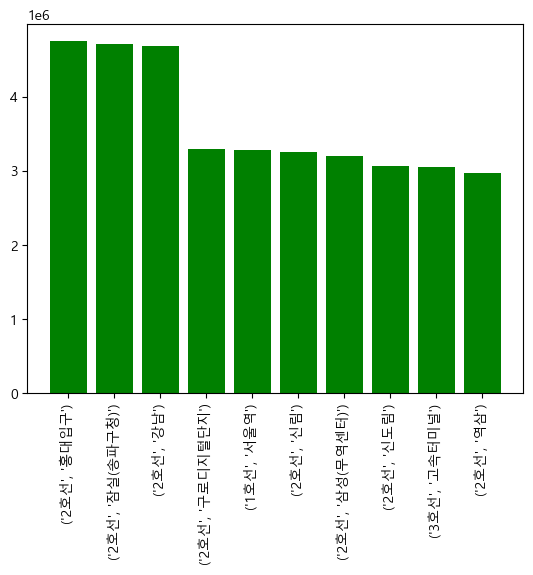

In [121]:
# 차트 그리기
plt.bar(range(10), top_10_station['승하차 인원'], color='g')
plt.xticks(range(10), top_10_station['지하철역'], rotation=90)
plt.show()
                                  